**Data Science Project: Predicting Home Prices in Delhi**

In [23]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor




Data Load: Load Delhi home prices into a dataframe


In [3]:
df1 = pd.read_csv("/content/Delhi.csv.csv")
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
df1.shape


(1259, 11)

In [ ]:
df1.columns


Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')




**Visualizing the Data**



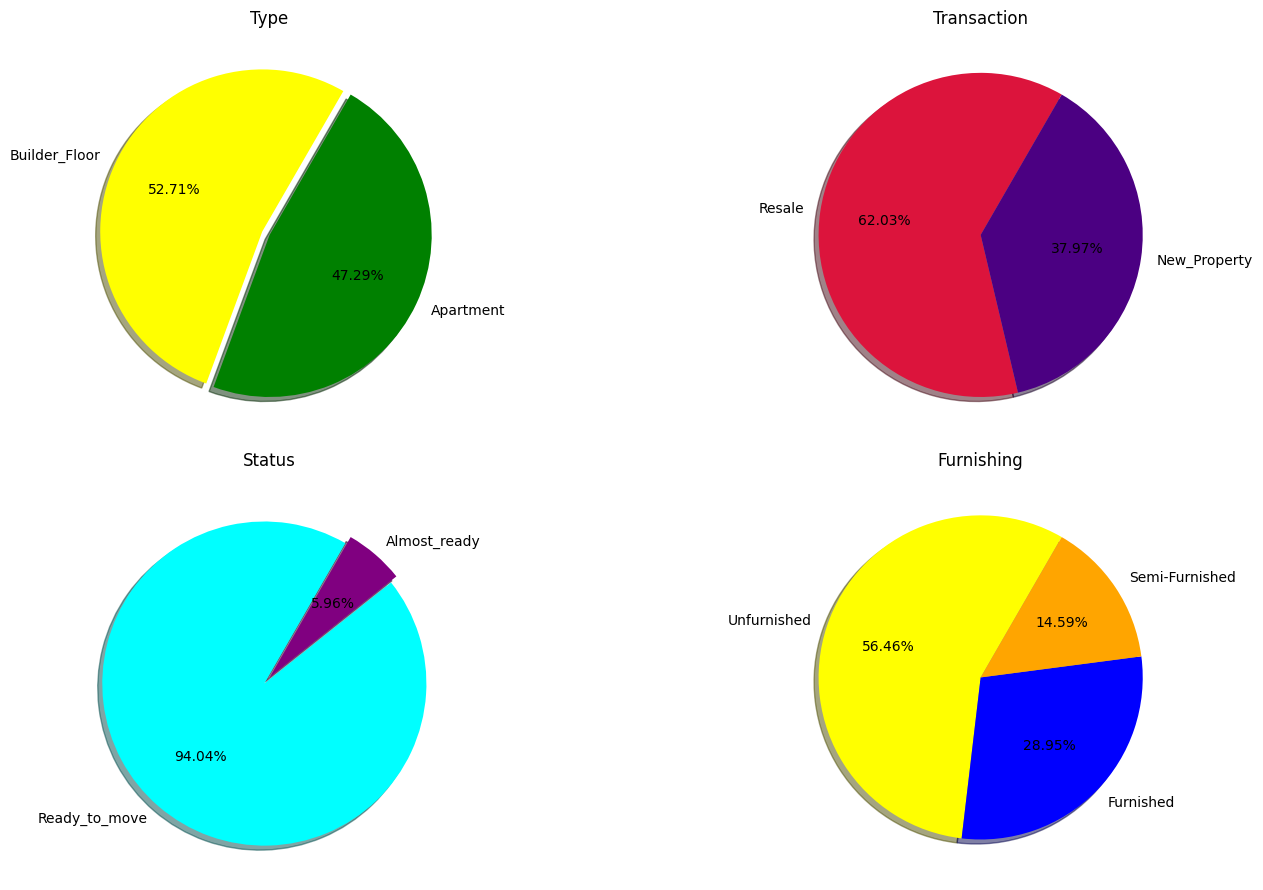

In [ ]:

fig, axs = plt.subplots(2, 2,figsize=(16,9))
axs[0, 0].pie(df1['Type'].value_counts(), colors=['yellow', 'green'],
            labels=['Builder_Floor', 'Apartment'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
axs[0, 0].set_title("Type")


axs[1, 0].pie(df1['Status'].value_counts(), colors=['cyan', 'purple'],
            labels=['Ready_to_move', 'Almost_ready'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
axs[1, 0].set_title("Status")


axs[0, 1].pie(df1['Transaction'].value_counts(),colors=['crimson', 'indigo'],
            labels=['Resale', 'New_Property'],
            autopct='%1.2f%%',
            shadow=True,
            startangle=60)
axs[0, 1].set_title("Transaction")

axs[1, 1].pie(df1['Furnishing'].value_counts(),colors=['yellow', 'blue', 'orange'],
            labels=['Unfurnished', 'Furnished','Semi-Furnished'],
            autopct='%1.2f%%',
            shadow=True,
            startangle=60)
axs[1, 1].set_title("Furnishing")
fig.tight_layout()
# Show the plots
plt.show()




**Visualizing how various factors affect Price**

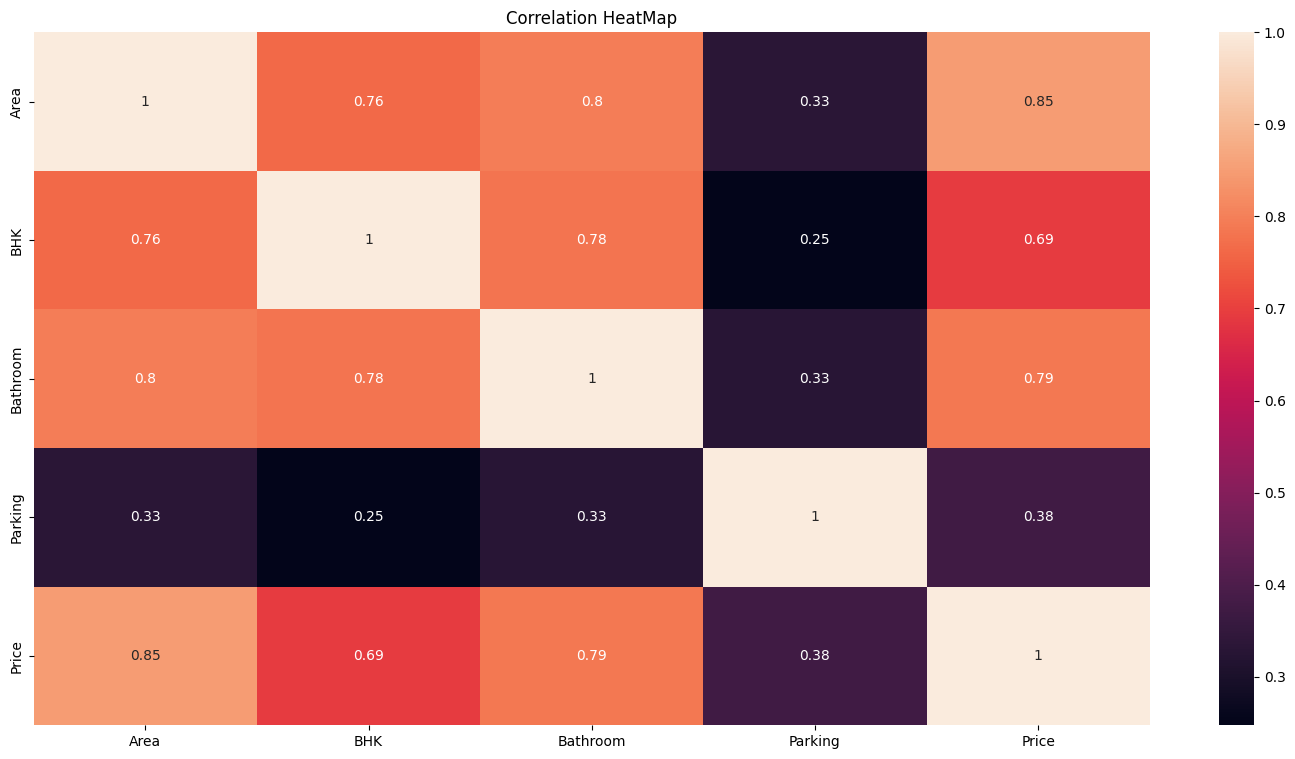

In [84]:
dfn=df1.drop(['Furnishing', 'Locality',
       'Status', 'Transaction', 'Type'],axis=1)

corr = dfn.corr(method='spearman')
plt.figure(figsize=(18,9))
plt.title("Correlation HeatMap")
sns.heatmap(corr, annot=True)
plt.show()

The heatmap above shows that the Price has a high correlation to number of Bathrooms and Area of the house. Number of rooms is also an important factor which could influence the price.However, number of parking available has little impact on price.

**Data Cleaning**

Checking for null values

In [ ]:
df1.isnull().sum()


,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Locality,0
Parking,33
Price,0
Status,0
Transaction,0
Type,5


Replacing null values with mean values

In [4]:
meanB = df1['Bathroom'].mean()
df1.Bathroom.fillna(value=meanB,inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

<ipython-input-4-a13b106d3149>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.Bathroom.fillna(value=meanB,inplace=True)
<ipython-input-4-a13b106d3149>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [5]:
df1.drop('Per_Sqft',axis=1,inplace=True)


In [6]:
 df1['Parking'] = df1['Parking'].fillna(0)

Add new column called price per square feet



In [7]:
df2 = df1.copy()
df2['price_per_sqft'] = df2['Price']/df2['Area']
df2.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,price_per_sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,9538.461538


In [ ]:
df2_stats = df2['price_per_sqft'].describe()


**Visualizing and Removing Outliers Using Box Plot**




<Axes: ylabel='price_per_sqft'>

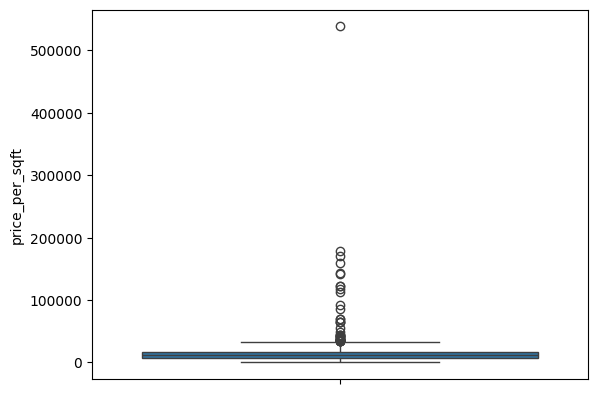

In [ ]:
import seaborn as sns
sns.boxplot(df2['price_per_sqft'])

Using z score method to remove outliers

In [8]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df2['price_per_sqft']))
print(z)

0       0.316340
1       0.387785
2       0.084932
3       0.371455
4       0.247094
          ...   
1254    0.060070
1255    0.131167
1256    0.265423
1257    0.145306
1258    0.632369
Name: price_per_sqft, Length: 1259, dtype: float64


In [9]:
import numpy as np

threshold_z = 0.5  # You can adjust this threshold as needed

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df2.drop(outlier_indices)
print("Original DataFrame Shape:", df2.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (1259, 11)
DataFrame Shape after Removing Outliers: (1045, 11)


<Axes: ylabel='price_per_sqft'>

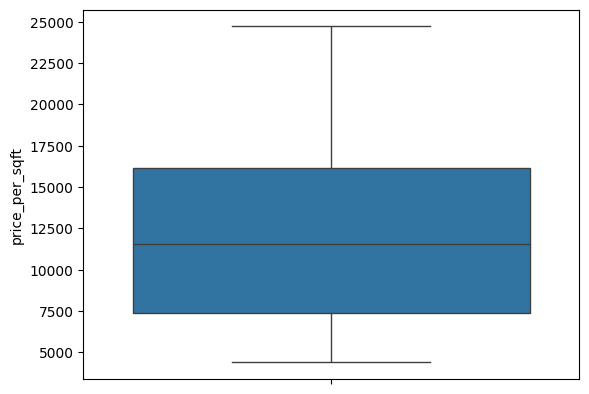

In [ ]:
sns.boxplot(no_outliers['price_per_sqft'])

**Label Encoding**


Label encoding to convert categorical values to numerical values

In [10]:
df3 = no_outliers.copy()


In [11]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df3['Furnishing']= label_encoder.fit_transform(df3['Furnishing'])


In [ ]:
df3.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,price_per_sqft
0,800.0,3,2.0,1,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.000000
1,750.0,2,2.0,1,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6666.666667


In [12]:
df3['Transaction']= label_encoder.fit_transform(df3['Transaction'])
df3['Status']= label_encoder.fit_transform(df3['Status'])
df3['Type']= label_encoder.fit_transform(df3['Type'])



In [ ]:
df3.head(2)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,price_per_sqft
0,800.0,3,2.0,1,1.0,6500000,1,0,1,8125.000000
1,750.0,2,2.0,1,1.0,5000000,1,0,0,6666.666667


In [13]:
df3.drop('Locality',axis=1,inplace=True)

In [ ]:
df3.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,price_per_sqft
0,800.0,3,2.0,1,1.0,6500000,1,0,1,8125.000000
1,750.0,2,2.0,1,1.0,5000000,1,0,0,6666.666667
2,950.0,2,2.0,0,1.0,15500000,1,1,0,16315.789474
3,600.0,2,2.0,1,1.0,4200000,1,1,1,7000.000000
4,650.0,2,2.0,1,1.0,6200000,1,0,1,9538.461538


In [14]:
df4 = df3.copy()


In [15]:
df4.drop('price_per_sqft',axis=1,inplace=True)

**Building a Model**

In [ ]:
len(df4)
len(df4.Price)

1045

In [ ]:
df4.shape


(1045, 10)

In [61]:
X = df4.drop(['Price'],axis='columns')
X.head(3)


,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type
0,800.0,3,2.0,1,1.0,1,0,1
1,750.0,2,2.0,1,1.0,1,0,0
2,950.0,2,2.0,0,1.0,1,1,0


In [ ]:
X.shape


(1045, 9)

In [62]:
y= df4.Price/100000
y.head(3)

,Price
0,65.0
1,50.0
2,155.0


In [ ]:
y.shape

(1045,)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


**Finding best model and hyper parameter tunning using GridSearchCV**


In [67]:
model_params = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {

               'fit_intercept': [True,False],
               'n_jobs': [1,5,None],
               'positive': [True,False]
        }
    },

    'Ridge': {
        'model': Ridge(),
        'params' : {

              'alpha':[0.1,0.001,3]

        }
        }
    ,
    'random_forest':
      {
        'model': RandomForestRegressor(),
        'params' : {
        'n_estimators': [1,5,10]
        }
    },
    'lasso_regression' : {
        'model': Lasso(),
        'params': {

                   'alpha': [0.01,0.00001,0.1]
        }
     },

    'KNN' : {
        'model': KNeighborsRegressor(),
        'params': {

            'n_neighbors': [1, 2, 3, 4, 5],
            'algorithm': ['auto','brute'],
            'p': [1,2],
        }

     },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error']

        }
    }
}

In [69]:


from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_

    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model = df.sort_values(['best_score'], ascending=[False])

best_model


,model,best_score,best_params
1,Ridge,0.822287,{'alpha': 3}
0,linear_regression,0.822224,"{'fit_intercept': True, 'n_jobs': 1, 'positive..."
3,lasso_regression,0.822224,{'alpha': 1e-05}
2,random_forest,0.809225,{'n_estimators': 10}
4,KNN,0.781986,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}"
5,decision_tree,0.720902,{'criterion': 'squared_error'}


It can be seen that Ridge Regression gives the best score. Therefore, using it for prediction.


In [70]:
model=Ridge(alpha=3)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8624242218822734

Finding mean absolute percentage error

In [81]:
from sklearn.metrics import mean_absolute_percentage_error

pred=model.predict(X_test)
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test,pred),"%")


Mean Absolute Percentage Error: 0.4508113899031238 %




Plotting real vs predicted values


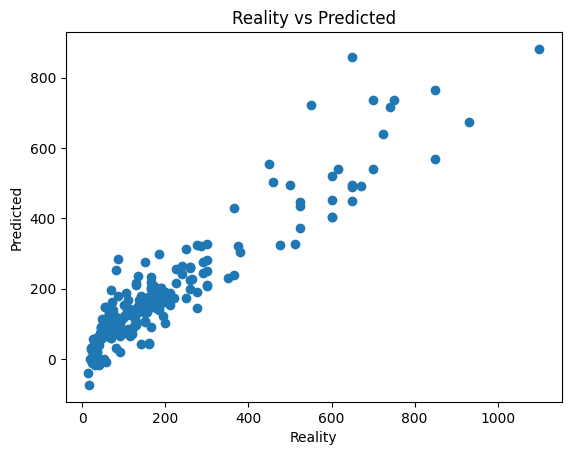

In [78]:
results = {}
results['Predicted'] = pred.round(2) # rounds up the predicted prices to two decimal places
results['Reality'] = y_test.values
plt.scatter(results['Reality'], results['Predicted'])
plt.xlabel('Reality')
plt.ylabel('Predicted')
plt.title('Reality vs Predicted')
plt.show()


